In [1]:
import torch 
import torch.nn as nn
import random

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset

import torch.nn.functional as F
import torch, gc
import torchvision
from torchvision import datasets, transforms

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from tqdm import tqdm_notebook as tqdm

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train_all.shape, y_train_all.shape)
print(type(x_train_all))

(50000, 32, 32, 3) (50000, 1)
<class 'numpy.ndarray'>


In [3]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [4]:
# fig = plt.figure(figsize=(15,7))

# for i in range(10):
#     plottable_image = x_train_all[i]
    
#     ax = fig.add_subplot(2, 5, i+1)
#     ax.title.set_text(class_names[y_train_all[i][0]])
#     ax.imshow(plottable_image)

In [5]:
from torchvision.transforms import transforms as TT
from torchvision.transforms import functional as FF
from torchvision import transforms, datasets

In [6]:
random_seed = 123
np.random.seed(random_seed)
torch.manual_seed(random_seed)
random.seed(random_seed)

In [7]:
rand_ratate_angle = np.random.randint(1,360, size=len(y_train_all))
print(len(rand_ratate_angle))
print(rand_ratate_angle[:10])

50000
[323  99 231  18  84 107 124  58 215 226]


In [8]:
x_train_all_rotate = [FF.normalize(TT.ToTensor()(FF.rotate(transforms.ToPILImage()(x), rand_ratate_angle[i] )),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5)) for i, x in enumerate(x_train_all)]
y_train_all_rotate = y_train_all

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

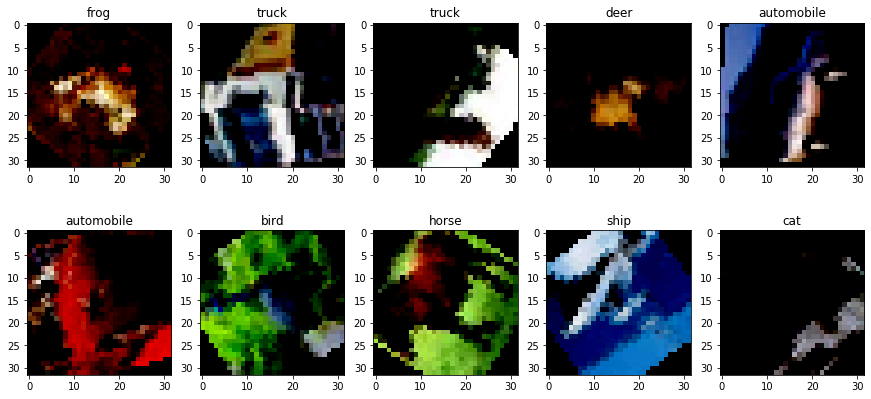

In [9]:
fig = plt.figure(figsize=(15,7))

for i in range(10):
    plottable_image = np.transpose(x_train_all_rotate[i], (1, 2, 0))
    
    ax = fig.add_subplot(2, 5, i+1)
    ax.title.set_text(class_names[y_train_all[i][0]])
    ax.imshow(plottable_image)

In [10]:
for i in range(10):
    print(class_names[y_train_all[i][0]])

frog
truck
truck
deer
automobile
automobile
bird
horse
ship
cat


In [11]:
'''
PIL 이미지, numpy 배열 -> pytorch Tensor
H W C -> C H W 로 바꿔줘야 함
원래 이미지 x_train_all 은 (H W C)
'''

x_train_all_hflip = [FF.normalize(TT.ToTensor()(FF.hflip(transforms.ToPILImage()(x))),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5)) for x in x_train_all]
y_train_all_hflip = y_train_all

In [12]:
# print(x_train_all_hflip[1])
# print(class_names[y_train_all_hflip[1][0]])
# plt.imshow(np.transpose(x_train_all_hflip[1],(1, 2, 0)))

In [13]:
x_train_all_vflip = [FF.normalize(TT.ToTensor()(FF.vflip(transforms.ToPILImage()(x))),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5)) for x in x_train_all]
y_train_all_vflip = y_train_all

In [14]:
# print(x_train_all_vflip[1])
# print(class_names[y_train_all_vflip[1][0]])
# plt.imshow(np.transpose(x_train_all_vflip[1],(1, 2, 0)))

In [15]:
x_train_all_org = [FF.normalize(TT.ToTensor()(x),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5)) for x in x_train_all] ## 자료형 list : tensor 들의 list
y_train_all_org = y_train_all ## np.array

In [19]:
x_train_all_list_of_tensors = x_train_all_org + x_train_all_vflip + x_train_all_hflip + x_train_all_rotate
y_train_all_list_of_tensors = y_train_all_org.tolist() + y_train_all_vflip.tolist() + y_train_all_hflip.tolist() + y_train_all_rotate.tolist()

In [20]:
x_train_all_torch = torch.stack(x_train_all_org + x_train_all_vflip + x_train_all_hflip + x_train_all_rotate)
y_train_all_torch = torch.LongTensor(y_train_all_list_of_tensors)

In [21]:
print(x_train_all_torch.shape)
print(y_train_all_torch.shape)

torch.Size([200000, 3, 32, 32])
torch.Size([200000, 1])


In [ ]:
# plt.imshow(x_train_all[23007])
# print(class_names[y_train_all[23007][0]])

In [ ]:
# plt.imshow(np.transpose(x_train_all_vflip[23007], (1, 2, 0)))
# print(class_names[y_train_all_vflip[23007][0]])

In [ ]:
# plt.imshow(np.transpose(x_train_all_hflip[23007], (1, 2, 0)))
# print(class_names[y_train_all_hflip[23007][0]])

In [ ]:
# plt.imshow(np.transpose(x_train_all_torch[73007], (1, 2, 0)))
# print(class_names[y_train_all_torch[73007]])

In [ ]:
# plt.imshow(np.transpose(x_train_all_torch[173007], (1, 2, 0)))
# print(class_names[y_train_all_torch[173007]])

In [22]:
x_train, x_valid, y_train, y_valid = train_test_split(np.array(x_train_all_torch),
                                                      np.array(y_train_all_list_of_tensors), 
                                                      stratify=np.array(y_train_all_list_of_tensors),
                                                     test_size=0.2,
                                                     random_state=42)

In [25]:
# gc.collect()
# torch.cuda.empty_cache()

In [27]:
x_train_torch = torch.FloatTensor(x_train).cuda() ### 40000개
y_train_torch = torch.LongTensor(y_train.squeeze(1)).cuda()

x_valid_torch = torch.FloatTensor(x_valid).cuda() ### 10000개
y_valid_torch = torch.LongTensor(y_valid.squeeze(1)).cuda() 

In [28]:
print(x_train_torch.shape)
print(y_train_torch.shape)

torch.Size([160000, 3, 32, 32])
torch.Size([160000])


In [29]:
x_test_transform = [FF.normalize(TT.ToTensor()(x),(0.5, 0.5, 0.5),(0.5, 0.5, 0.5)) for x in x_test]
y_test_transform = y_test.squeeze(1).tolist()

x_test_torch = torch.stack(x_test_transform, dim=0)
y_test_torch = torch.LongTensor(y_test_transform)

print(x_test_torch.shape)
print(y_test_torch.shape)

torch.Size([10000, 3, 32, 32])
torch.Size([10000])


In [ ]:
# ## 0~1 사이의 값으로 정규화
# x_train = x_train / 255
# x_valid = x_valid / 255 
# x_test = x_test / 255

# y_train_encoded = tf.keras.utils.to_categorical(y_train)
# y_valid_encoded = tf.keras.utils.to_categorical(y_valid)


# x_train_torch = torch.FloatTensor(np.transpose(x_train, (0, 3, 1, 2))).cuda() ### 40000개
# y_train_torch = torch.LongTensor(y_train.squeeze(1)).cuda()

# x_valid_torch = torch.FloatTensor(np.transpose(x_valid, (0, 3, 1, 2))).cuda() ### 10000개
# y_valid_torch = torch.LongTensor(y_valid.squeeze(1)).cuda() 

# x_test_torch = torch.FloatTensor(np.transpose(x_test, (0, 3, 1, 2))).cuda()
# y_test_torch = torch.LongTensor(y_test.squeeze(1)).cuda()

In [30]:
class CifarDataset(Dataset):
    def __init__(self, x, y):
        self.x_data = x
        self.y_data = y
        
    def __getitem__(self, index):
        x = self.x_data[index]
        y = self.y_data[index]
        return x, y
    
    def collate_fn(self, batch):
        x, y = zip(*batch)
        return x, y

    def __len__(self):
        return len(self.x_data)

In [104]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 48, kernel_size = 3, padding = 1, stride = 2)
        self.conv2 = nn.Conv2d(in_channels = 48, out_channels = 96, kernel_size = 3, padding = 1)
        self.conv3 = nn.Conv2d(in_channels = 96, out_channels = 192, kernel_size = 3, padding = 1)
        self.conv4 = nn.Conv2d(in_channels = 192, out_channels = 384, kernel_size = 3, padding = 1)
        self.conv5 = nn.Conv2d(in_channels = 384, out_channels = 768, kernel_size = 3, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding=1)
        self.fc1 = nn.Linear(1 * 1 * 768, 512)
#         self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512, 10)
        self.dropout1 = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.25)
        

    def forward(self, x):
       
        x = F.relu(self.conv1(x)) # 32 * 32 * 3 -> 16 * 16 * 48
        x = F.relu(self.conv2(x)) # 16 * 16 * 48 -> 16 * 16 * 96
        x = self.pool(x) # 8 * 8 * 96
        
        x = F.relu(self.conv3(x))
        x = self.dropout1(x)
        x = self.pool(x) # 4 * 4 * 192
        
        x = F.relu(self.conv4(x))
        x = self.dropout1(x)
        x = self.pool(x) # 2 * 2 * 384
        
        x = F.relu(self.conv5(x))
        x = self.dropout1(x)
        x = self.pool(x) # 1 * 1 * 768
        
        x = x.view(-1, 1 * 1 * 768)
        x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1) ### -> NLLLoss써야함!!!

        return x
        

In [109]:
class Train(nn.Module):
    def __init__(self, learning_rate=0.0001):
        super(Train, self).__init__()
        
        self.model = ConvNet().cuda()

        self.optim = torch.optim.Adam(self.model.parameters(), lr=learning_rate)
        self.criterion = nn.NLLLoss()
#         self.criterion = nn.CrossEntropyLoss()
        
        self.running_loss_history = []
        self.running_correct_history = []
        self.validation_loss_history = []
        self.validation_correct_history = []
    
    
    def predict(self, dataloader, valid=True):
        self.model.eval()

        validation_running_loss = 0.0
        validation_running_correct = 0.0
        
        total_len = len(dataloader.dataset)
        
        with torch.no_grad():
            for data in dataloader:
                val_input = data[0].cuda()
                val_label = data[1].cuda()

                val_output = self.model(val_input)
                val_loss = self.criterion(val_output, val_label)
                val_preds = torch.argmax(val_output, 1)
                
                
                validation_running_loss += val_loss.item()
                validation_running_correct += (val_preds == val_label).sum().item()
                
            val_epoch_loss = validation_running_loss / total_len
            val_epoch_acc = validation_running_correct / total_len

       
        if valid:
            self.validation_loss_history.append(val_epoch_loss)
            self.validation_correct_history.append(val_epoch_acc)

        self.model.train()

        return val_epoch_loss, val_epoch_acc
        
    
    def train(self, dataloader, epochs=20):
        global_step = 0
        
        
        total_len = len(dataloader.dataset)

        for e in range(epochs):
            t = tqdm(dataloader)
            running_loss = 0.0
            running_correct = 0.0
            for i, B in enumerate(t):
                inputs = B[0]
                labels = B[1] ## (B,1)
                
                outputs = self.model(inputs) 

                loss = self.criterion(outputs, labels) ## (32, 10) - (32)
                
                self.model.zero_grad()
                self.optim.zero_grad()

                loss.backward()
                self.optim.step()
                
                preds = torch.argmax(outputs, 1)

                running_correct += (preds == labels).sum().item()
                running_loss += loss.item()
                
                global_step += 1

            epoch_loss = running_loss / total_len
            epoch_acc = running_correct / total_len
            
            self.running_loss_history.append(epoch_loss)
            self.running_correct_history.append(epoch_acc)
            
            print("epoch: {} | global_step : {} | run_loss : {:.4f} | run_acc : {:%}".format(e + 1, global_step, epoch_loss, epoch_acc))
    
            val_epoch_loss, val_epoch_acc = self.predict(evalloader)
            print("epoch: {} | global_step : {} | val_loss : {:.4f} | val_acc : {:%}".format(e + 1, global_step, val_epoch_loss, val_epoch_acc))
            
    
    def print_graph(self):
        fig = plt.figure(figsize=(12, 4))
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)
        x = np.linspace(1, len(self.running_correct_history),len(self.running_correct_history))
        ax1.plot(x, self.running_loss_history, color='r', label="run_loss")
        ax1.plot(x, self.validation_loss_history,color='b', label="val_loss")
        ax1.set_title('loss')
        ax2.plot(x, self.running_correct_history, label="run_acc")
        ax2.plot(x, self.validation_correct_history, label="val_acc")
        ax2.set_title('acc')
        fig.legend()

In [106]:
b_size=1000

dataset = CifarDataset(x_train_torch, y_train_torch)
dataloader = DataLoader(dataset, batch_size=b_size, shuffle=True, drop_last=True)

testset = CifarDataset(x_test_torch, y_test_torch)
testloader = DataLoader(testset, batch_size=b_size, shuffle=True, drop_last=True)

evalset = CifarDataset(x_valid_torch, y_valid_torch)
evalloader = DataLoader(evalset, batch_size=b_size, shuffle=True, drop_last=True)

# *test_acc : 80.64%

Train(
  (model): ConvNet(
    (conv1): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv2): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv4): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv5): Conv2d(384, 768, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (fc1): Linear(in_features=768, out_features=512, bias=True)
    (fc3): Linear(in_features=512, out_features=10, bias=True)
    (dropout1): Dropout(p=0.5, inplace=False)
    (dropout2): Dropout(p=0.25, inplace=False)
  )
  (criterion): NLLLoss()
)



epoch: 1 | global_step : 160 | run_loss : 0.0018 | run_acc : 32.295000%
epoch: 1 | global_step : 160 | val_loss : 0.0019 | val_acc : 43.932500%



epoch: 2 | global_step : 320 | run_loss : 0.0014 | run_acc : 49.782500%
epoch: 2 | global_step : 320 | val_loss : 0.0016 | val_acc : 54.900000%



epoch: 3 | global_step : 480 | run_loss : 0.0012 | run_acc : 58.035000%
epoch: 3 | global_step : 480 | val_loss : 0.0015 | val_acc : 60.157500%



epoch: 4 | global_step : 640 | run_loss : 0.0010 | run_acc : 62.588125%
epoch: 4 | global_step : 640 | val_loss : 0.0014 | val_acc : 62.682500%



epoch: 5 | global_step : 800 | run_loss : 0.0010 | run_acc : 65.570625%
epoch: 5 | global_step : 800 | val_loss : 0.0013 | val_acc : 66.212500%



epoch: 6 | global_step : 960 | run_loss : 0.0009 | run_acc : 67.996250%
epoch: 6 | global_step : 960 | val_loss : 0.0013 | val_acc : 67.092500%



epoch: 7 | global_step : 1120 | run_loss : 0.0009 | run_acc : 69.401250%
epoch: 7 | global_step : 1120 | val_loss : 0.0013 | val_acc : 68.555000%



epoch: 8 | global_step : 1280 | run_loss : 0.0008 | run_acc : 70.807500%
epoch: 8 | global_step : 1280 | val_loss : 0.0012 | val_acc : 69.412500%



epoch: 9 | global_step : 1440 | run_loss : 0.0008 | run_acc : 71.992500%
epoch: 9 | global_step : 1440 | val_loss : 0.0012 | val_acc : 70.785000%



epoch: 10 | global_step : 1600 | run_loss : 0.0008 | run_acc : 73.003750%
epoch: 10 | global_step : 1600 | val_loss : 0.0011 | val_acc : 72.505000%



epoch: 11 | global_step : 1760 | run_loss : 0.0007 | run_acc : 74.153750%
epoch: 11 | global_step : 1760 | val_loss : 0.0011 | val_acc : 72.420000%



epoch: 12 | global_step : 1920 | run_loss : 0.0007 | run_acc : 74.800625%
epoch: 12 | global_step : 1920 | val_loss : 0.0010 | val_acc : 73.002500%



epoch: 13 | global_step : 2080 | run_loss : 0.0007 | run_acc : 75.586875%
epoch: 13 | global_step : 2080 | val_loss : 0.0011 | val_acc : 71.670000%



epoch: 14 | global_step : 2240 | run_loss : 0.0007 | run_acc : 76.537500%
epoch: 14 | global_step : 2240 | val_loss : 0.0010 | val_acc : 73.147500%



epoch: 15 | global_step : 2400 | run_loss : 0.0006 | run_acc : 76.938125%
epoch: 15 | global_step : 2400 | val_loss : 0.0010 | val_acc : 73.310000%



epoch: 16 | global_step : 2560 | run_loss : 0.0006 | run_acc : 77.472500%
epoch: 16 | global_step : 2560 | val_loss : 0.0010 | val_acc : 73.762500%



epoch: 17 | global_step : 2720 | run_loss : 0.0006 | run_acc : 77.926875%
epoch: 17 | global_step : 2720 | val_loss : 0.0009 | val_acc : 74.835000%



epoch: 18 | global_step : 2880 | run_loss : 0.0006 | run_acc : 78.526875%
epoch: 18 | global_step : 2880 | val_loss : 0.0010 | val_acc : 75.055000%



epoch: 19 | global_step : 3040 | run_loss : 0.0006 | run_acc : 78.754375%
epoch: 19 | global_step : 3040 | val_loss : 0.0009 | val_acc : 75.102500%



epoch: 20 | global_step : 3200 | run_loss : 0.0006 | run_acc : 79.175000%
epoch: 20 | global_step : 3200 | val_loss : 0.0009 | val_acc : 75.150000%



epoch: 21 | global_step : 3360 | run_loss : 0.0006 | run_acc : 79.597500%
epoch: 21 | global_step : 3360 | val_loss : 0.0009 | val_acc : 74.052500%



epoch: 22 | global_step : 3520 | run_loss : 0.0006 | run_acc : 79.906250%
epoch: 22 | global_step : 3520 | val_loss : 0.0009 | val_acc : 75.462500%



epoch: 23 | global_step : 3680 | run_loss : 0.0005 | run_acc : 80.213750%
epoch: 23 | global_step : 3680 | val_loss : 0.0009 | val_acc : 74.880000%



epoch: 24 | global_step : 3840 | run_loss : 0.0005 | run_acc : 80.737500%
epoch: 24 | global_step : 3840 | val_loss : 0.0009 | val_acc : 76.230000%



epoch: 25 | global_step : 4000 | run_loss : 0.0005 | run_acc : 80.980625%
epoch: 25 | global_step : 4000 | val_loss : 0.0009 | val_acc : 75.407500%



epoch: 26 | global_step : 4160 | run_loss : 0.0005 | run_acc : 81.469375%
epoch: 26 | global_step : 4160 | val_loss : 0.0009 | val_acc : 76.077500%



epoch: 27 | global_step : 4320 | run_loss : 0.0005 | run_acc : 81.558750%
epoch: 27 | global_step : 4320 | val_loss : 0.0008 | val_acc : 76.277500%



epoch: 28 | global_step : 4480 | run_loss : 0.0005 | run_acc : 81.940625%
epoch: 28 | global_step : 4480 | val_loss : 0.0008 | val_acc : 76.265000%



epoch: 29 | global_step : 4640 | run_loss : 0.0005 | run_acc : 82.180000%
epoch: 29 | global_step : 4640 | val_loss : 0.0009 | val_acc : 76.170000%



epoch: 30 | global_step : 4800 | run_loss : 0.0005 | run_acc : 82.245625%
epoch: 30 | global_step : 4800 | val_loss : 0.0008 | val_acc : 76.930000%



epoch: 31 | global_step : 4960 | run_loss : 0.0005 | run_acc : 82.527500%
epoch: 31 | global_step : 4960 | val_loss : 0.0008 | val_acc : 76.197500%



epoch: 32 | global_step : 5120 | run_loss : 0.0005 | run_acc : 83.107500%
epoch: 32 | global_step : 5120 | val_loss : 0.0008 | val_acc : 76.830000%



epoch: 33 | global_step : 5280 | run_loss : 0.0005 | run_acc : 82.950000%
epoch: 33 | global_step : 5280 | val_loss : 0.0008 | val_acc : 77.532500%



epoch: 34 | global_step : 5440 | run_loss : 0.0005 | run_acc : 83.308125%
epoch: 34 | global_step : 5440 | val_loss : 0.0008 | val_acc : 76.587500%



epoch: 35 | global_step : 5600 | run_loss : 0.0005 | run_acc : 83.470000%
epoch: 35 | global_step : 5600 | val_loss : 0.0008 | val_acc : 76.967500%



epoch: 36 | global_step : 5760 | run_loss : 0.0004 | run_acc : 83.722500%
epoch: 36 | global_step : 5760 | val_loss : 0.0008 | val_acc : 77.292500%



epoch: 37 | global_step : 5920 | run_loss : 0.0004 | run_acc : 83.813125%
epoch: 37 | global_step : 5920 | val_loss : 0.0008 | val_acc : 77.432500%



epoch: 38 | global_step : 6080 | run_loss : 0.0004 | run_acc : 84.128125%
epoch: 38 | global_step : 6080 | val_loss : 0.0008 | val_acc : 77.545000%



epoch: 39 | global_step : 6240 | run_loss : 0.0004 | run_acc : 84.330625%
epoch: 39 | global_step : 6240 | val_loss : 0.0008 | val_acc : 76.775000%



epoch: 40 | global_step : 6400 | run_loss : 0.0004 | run_acc : 84.363750%
epoch: 40 | global_step : 6400 | val_loss : 0.0008 | val_acc : 77.440000%



epoch: 41 | global_step : 6560 | run_loss : 0.0004 | run_acc : 84.739375%
epoch: 41 | global_step : 6560 | val_loss : 0.0008 | val_acc : 77.362500%



epoch: 42 | global_step : 6720 | run_loss : 0.0004 | run_acc : 84.800000%
epoch: 42 | global_step : 6720 | val_loss : 0.0008 | val_acc : 78.080000%



epoch: 43 | global_step : 6880 | run_loss : 0.0004 | run_acc : 85.001250%
epoch: 43 | global_step : 6880 | val_loss : 0.0008 | val_acc : 77.722500%



epoch: 44 | global_step : 7040 | run_loss : 0.0004 | run_acc : 85.057500%
epoch: 44 | global_step : 7040 | val_loss : 0.0008 | val_acc : 77.762500%



epoch: 45 | global_step : 7200 | run_loss : 0.0004 | run_acc : 85.152500%
epoch: 45 | global_step : 7200 | val_loss : 0.0007 | val_acc : 78.150000%



epoch: 46 | global_step : 7360 | run_loss : 0.0004 | run_acc : 85.170000%
epoch: 46 | global_step : 7360 | val_loss : 0.0008 | val_acc : 77.915000%



epoch: 47 | global_step : 7520 | run_loss : 0.0004 | run_acc : 85.562500%
epoch: 47 | global_step : 7520 | val_loss : 0.0008 | val_acc : 78.100000%
test_loss : 0.0007 | test_acc : 80.640000%


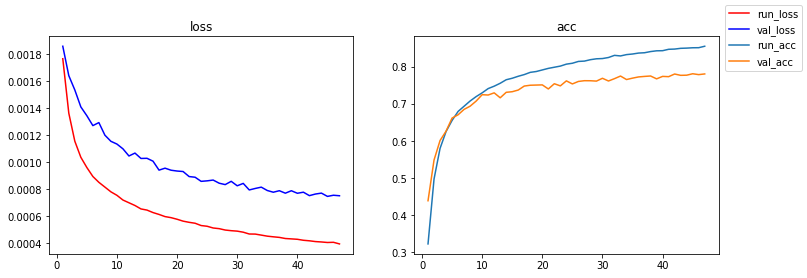

In [110]:
'''
batch_size = 1000
데이터 : 20만개
conv5 768 -> 512 -> 10

'''

random_seed = 123
np.random.seed(random_seed)
torch.manual_seed(random_seed)
random.seed(random_seed)

gc.collect()
torch.cuda.empty_cache()

myT = Train(learning_rate=1e-3)
print(myT)
myT.train(dataloader, epochs=47) #### 81.58%  67에폭

print("===============================================================================")
test_loss, test_acc = myT.predict(testloader, False)
print("test_loss : {:.4f} | test_acc : {:%}".format(test_loss, test_acc))
print("===============================================================================")

myT.print_graph()

## * 다른 버전 테스트 